# Data analysis


In [69]:
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os

%matplotlib inline

## Analyze orginal unprocessed images

In [70]:
index_path = '../data/unprocessed/manlabel.txt'
index = pd.read_csv(index_path,
                delim_whitespace=True, 
                header=None, 
                names=['image','min_y','min_x','max_y','max_x','label'])


In [71]:
index.describe()

,min_y,min_x,max_y,max_x
count,31760.000000,31760.000000,31760.000000,31760.000000
mean,267.035264,213.500000,329.769270,273.500000
std,112.058237,139.770759,111.462291,139.770759
min,70.000000,0.000000,129.000000,60.000000
25%,168.000000,106.750000,233.000000,166.750000
50%,270.000000,213.500000,330.000000,273.500000
75%,364.000000,320.250000,428.000000,380.250000
max,460.000000,427.000000,511.000000,487.000000


In [72]:
gb = index.groupby('label')

In [73]:
counts = gb.count()
counts['image']

label
UNKNOWN             137
bark_pocket          55
core_stripe         340
decayed_knot         37
dry_knot            474
edge_knot           155
encased_knot        142
horn_knot           145
knot_hole            53
leaf_knot           126
mould               261
moustache_knot       30
resin                60
resin_pocket        139
small_knot          369
sound             25808
sound_knot          553
split               750
wane               2126
Name: image, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

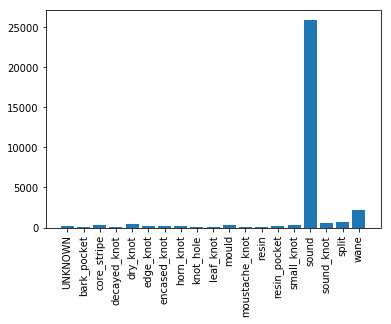

In [74]:
plt.bar(counts.index, counts['image'])
plt.xticks(rotation='vertical')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

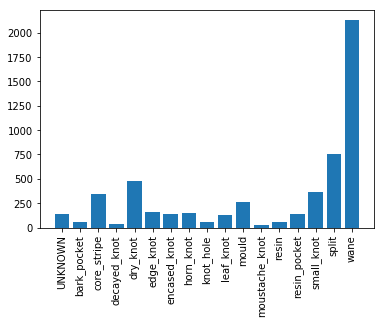

In [75]:
filtered = counts.filter(axis=0,  regex='^((?!sound).)*$')
plt.bar(filtered.index, filtered['image'])
plt.xticks(rotation='vertical')


## Analyzed processed images

In [76]:
development_image_folder = '../data/snapshots/development'
images = os.listdir(development_image_folder)
print(len(images))

97101


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

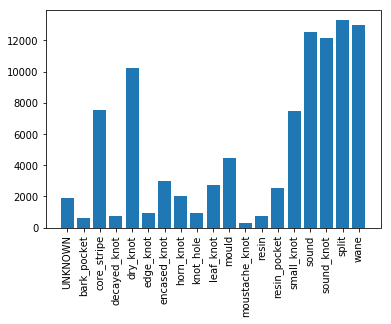

In [77]:

labels = [name[name.find('_')+1 : name.rfind('_')] for name in images]
alabels = np.array(labels)
unique_elements, counts_elements = np.unique(alabels, return_counts=True)
plt.bar(unique_elements, counts_elements)
plt.xticks(rotation='vertical')

In [78]:
testing_image_folder = '../data/snapshots/testing'
images = os.listdir(testing_image_folder)
print(len(images))

8621


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

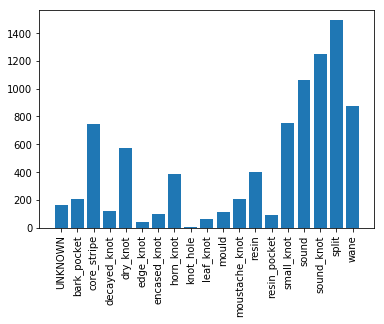

In [79]:

labels = [name[name.find('_')+1 : name.rfind('_')] for name in images]
alabels = np.array(labels)
unique_elements, counts_elements = np.unique(alabels, return_counts=True)
plt.bar(unique_elements, counts_elements)
plt.xticks(rotation='vertical')